In [19]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
from config import getClient
from datetime import timedelta
from dateutil import parser

In [20]:
dataloc = getClient("OutFront")

In [21]:
df = pd.read_csv(dataloc+"predictions.csv")

# Convert their date format to a standard date
df["date"] = pd.to_datetime(df["date"])

In [22]:
# Get a random panel to view
panels = df["panel"].unique()
panel = np.random.choice(panels)

df2 = df.loc[df["panel"]==panel]

start = df2["date"].min()

##### Actual vs STL

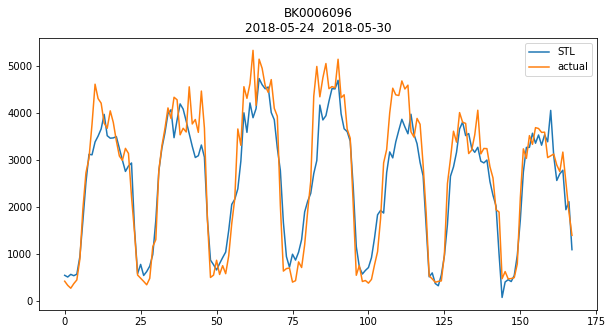

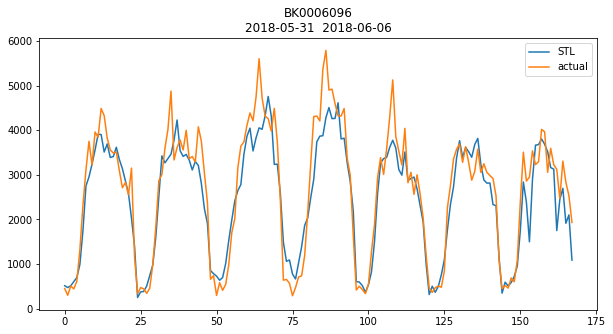

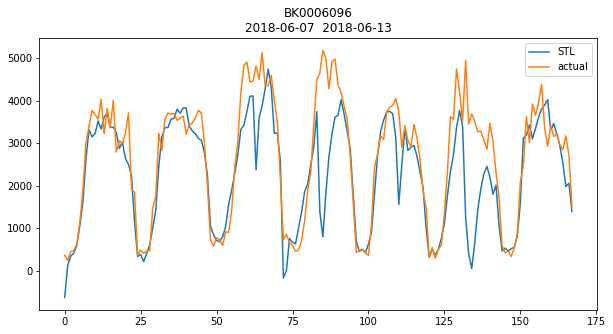

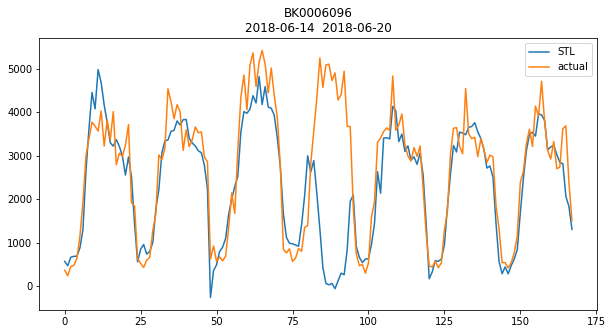

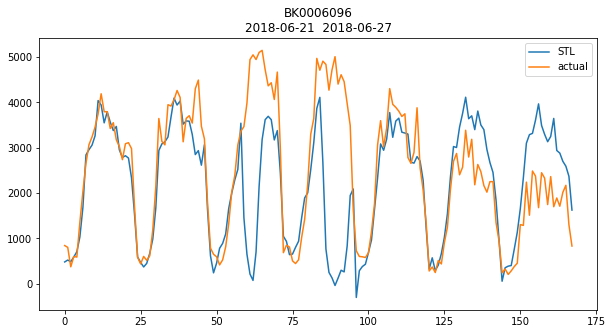

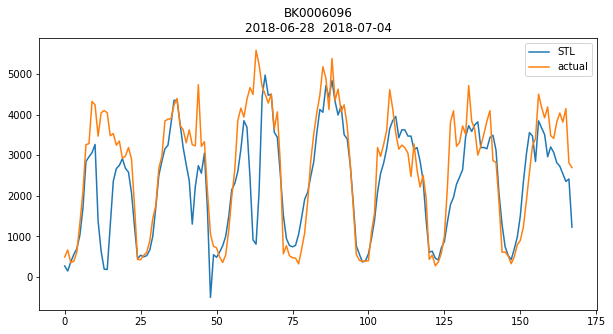

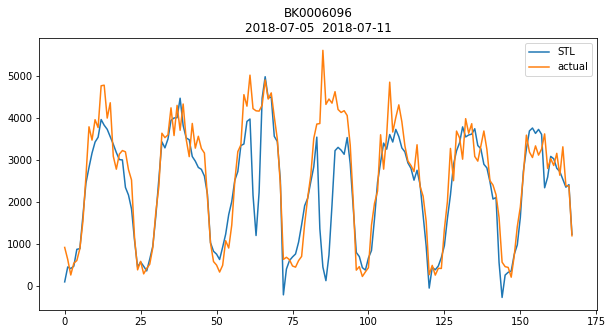

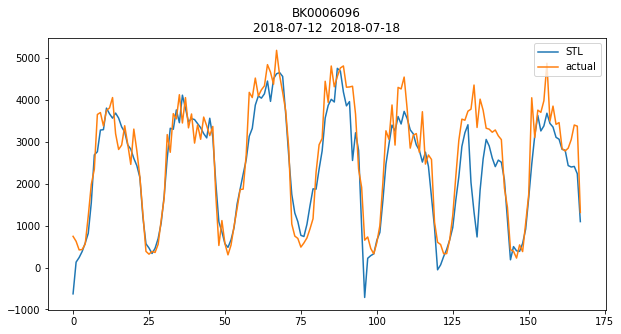

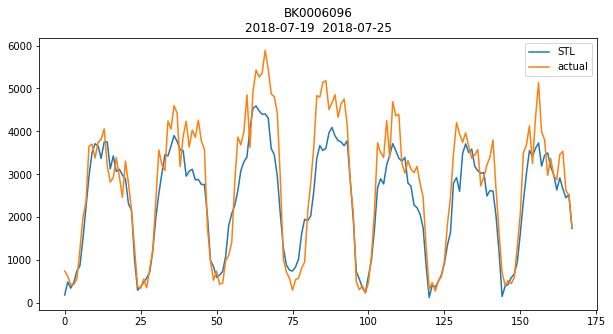

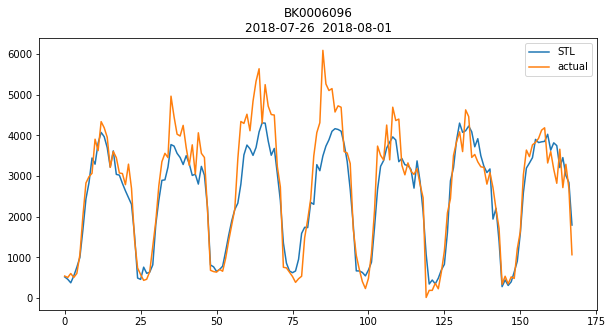

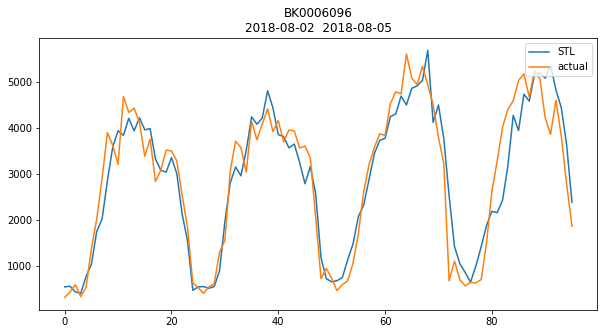

In [23]:
start = df2["date"].min()
while start < df2["date"].max():
    end = start+timedelta(weeks=1)
    tmp = df2.loc[~(df2["date"] < start) & (df2["date"] < end)]
    fromdt = tmp["date"].min().date()
    todt   = tmp["date"].max().date()
    X = [x for x in range(tmp.shape[0])]
    plt.figure(figsize=(10,5))
    plt.plot(X, tmp["STL"])
    plt.plot(X, tmp["actual"])
    plt.legend(loc=1)
    t = panel+"\n"+str(fromdt)+"  "+str(todt)
    plt.title(t)
    plt.show()
    start = end

##### XGB vs RF and actual

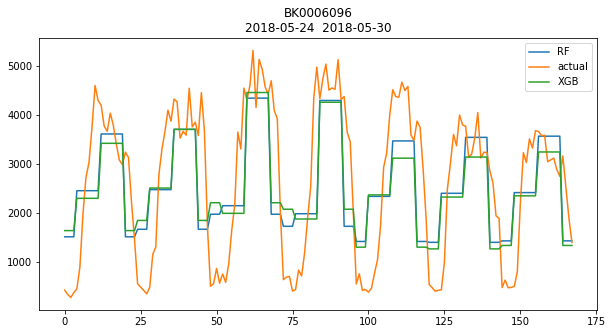

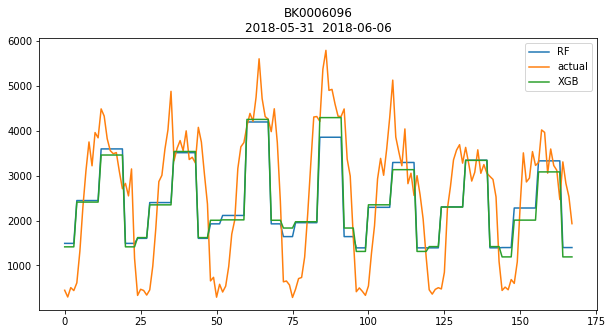

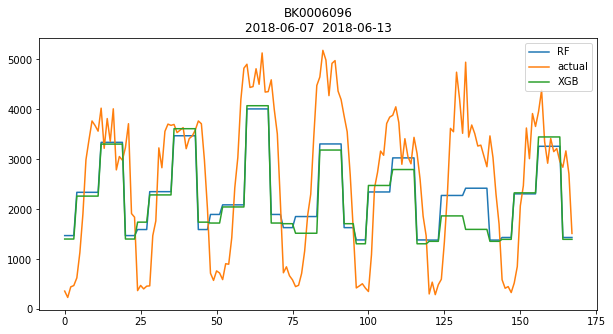

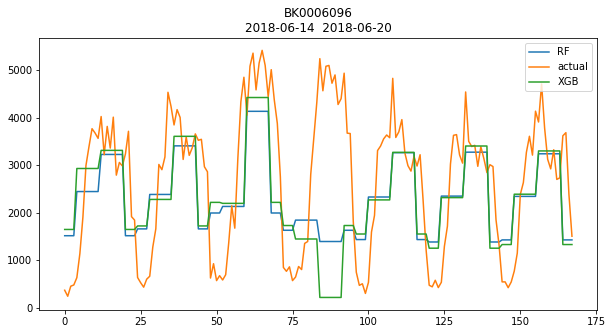

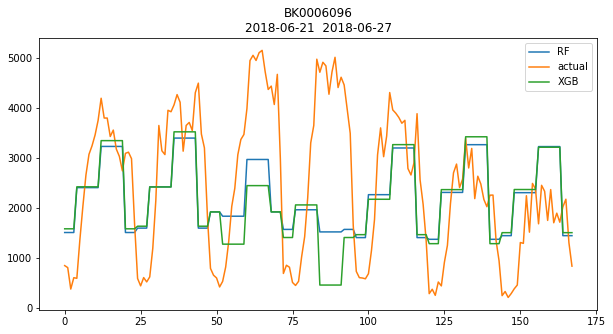

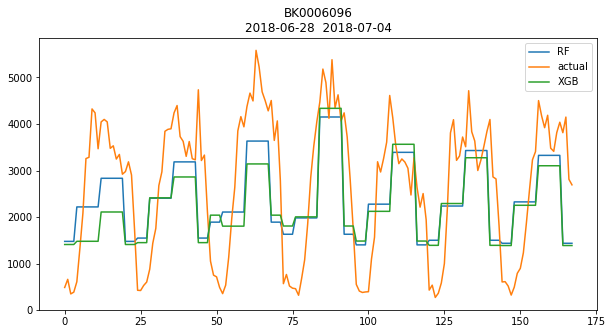

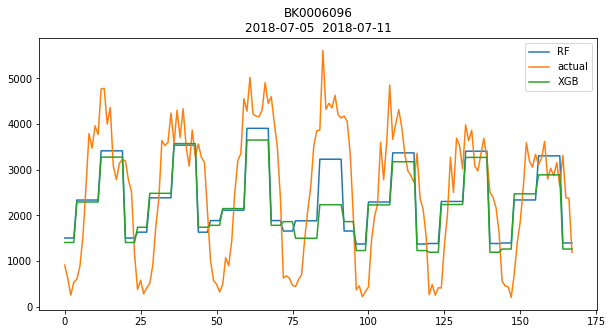

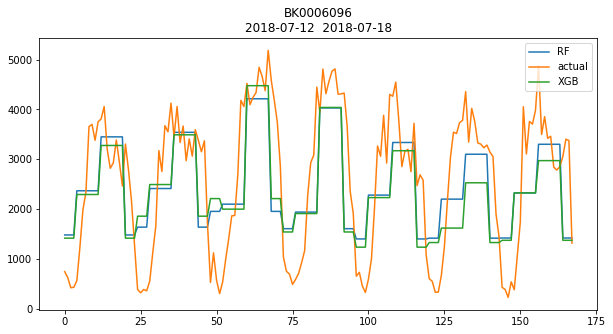

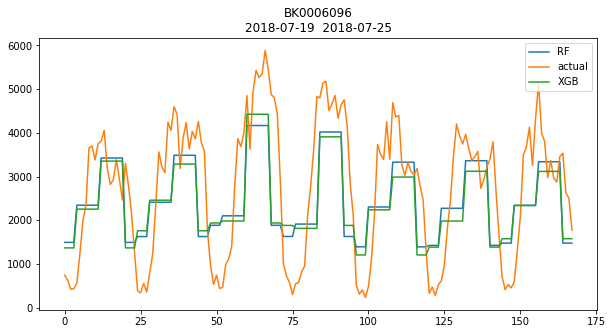

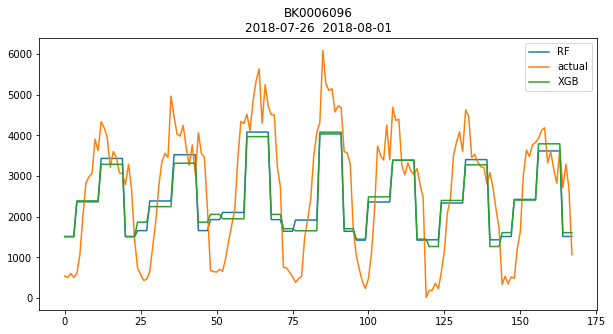

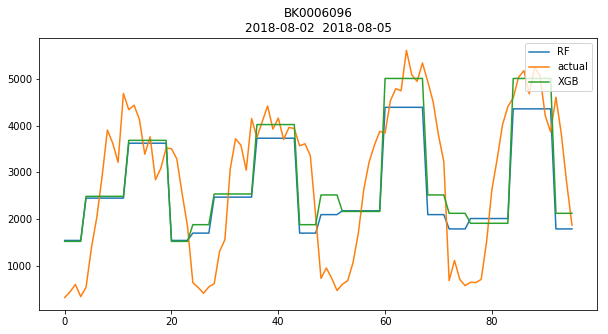

In [24]:
start = df2["date"].min()
while start < df2["date"].max():
    end = start+timedelta(weeks=1)
    tmp = df2.loc[~(df2["date"] < start) & (df2["date"] < end)]
    fromdt = tmp["date"].min().date()
    todt   = tmp["date"].max().date()
    X = [x for x in range(tmp.shape[0])]
    plt.figure(figsize=(10,5))
    plt.plot(X, tmp["RF"])
    plt.plot(X, tmp["actual"])
    plt.plot(X, tmp["XGB"])
    plt.legend(loc=1)
    t = panel+"\n"+str(fromdt)+"  "+str(todt)
    plt.title(t)
    plt.show()
    start = end